In [288]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [34]:
df = pd.read_csv('realtor-data.csv')

In [187]:
df_test = pd.read_csv('realtor-data.csv')

In [35]:
df.shape

(206000, 10)

In [36]:
df.columns

Index(['status', 'bed', 'bath', 'acre_lot', 'city', 'state', 'zip_code',
       'house_size', 'prev_sold_date', 'price'],
      dtype='object')

In [289]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:bed     14.0
bath    14.0
dtype: float64
Peak to Peak range by column in Normalized X:[ 9.70142155 12.60875894]


In [37]:
df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


In [40]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

IQR = Q3-Q1

upper_bound = Q3 + (1.5 * IQR)
lower_bound = 0

print (Q1, Q3)
print (upper_bound, lower_bound)

249900.0 890000.0
1850150.0 0


In [41]:
df = df.loc[(df['price']< upper_bound) & (df['price']> 50_000)]

In [42]:
df.shape

(180295, 10)

In [48]:
df.loc[df['price'] == 51_000]

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
29820,for_sale,NaN,NaN,6.92,Palmer,Massachusetts,1069.0,NaN,NaN,51000.0
30985,for_sale,NaN,NaN,6.92,Palmer,Massachusetts,1069.0,NaN,NaN,51000.0
32355,for_sale,NaN,NaN,6.92,Palmer,Massachusetts,1069.0,NaN,NaN,51000.0
33680,for_sale,NaN,NaN,6.92,Palmer,Massachusetts,1069.0,NaN,NaN,51000.0
37582,for_sale,NaN,NaN,6.92,Palmer,Massachusetts,1069.0,NaN,NaN,51000.0
38051,for_sale,NaN,NaN,6.92,Palmer,Massachusetts,1069.0,NaN,NaN,51000.0
39563,for_sale,NaN,NaN,6.92,Palmer,Massachusetts,1069.0,NaN,NaN,51000.0
40302,for_sale,NaN,NaN,6.92,Palmer,Massachusetts,1069.0,NaN,NaN,51000.0
42788,for_sale,NaN,NaN,6.92,Palmer,Massachusetts,1069.0,NaN,NaN,51000.0
43353,for_sale,NaN,NaN,6.92,Palmer,Massachusetts,1069.0,NaN,NaN,51000.0


In [52]:
duplicated_rows = df[df.duplicated()]
print(duplicated_rows.head())

       status  bed  bath  acre_lot        city        state  zip_code  \
77   for_sale  NaN   NaN      0.21      Aguada  Puerto Rico     602.0   
135  for_sale  3.0   2.0      0.08       Ponce  Puerto Rico     728.0   
139  for_sale  5.0   3.0      7.46  Las Marias  Puerto Rico     670.0   
140  for_sale  3.0   2.0      0.10       Lares  Puerto Rico     669.0   
148  for_sale  3.0   2.0      0.05       Yauco  Puerto Rico     698.0   

     house_size prev_sold_date     price  
77          NaN            NaN   74000.0  
135      1500.0            NaN  105000.0  
139      5403.0            NaN  300000.0  
140      4161.0            NaN  155000.0  
148      1118.0            NaN  122500.0  


In [136]:
df.loc[df['bed']>10]

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
27841,for_sale,12.0,3.0,0.15,Springfield,Massachusetts,1105.0,3902.0,2014-12-24,369900.0
28093,for_sale,13.0,7.0,0.20,Adams,Massachusetts,1220.0,4233.0,2008-09-15,324900.0
28596,for_sale,14.0,15.0,2.40,Great Barrington,Massachusetts,1230.0,10302.0,2009-06-12,1390000.0
28895,for_sale,20.0,18.0,0.71,Pittsfield,Massachusetts,1201.0,15096.0,2010-11-17,239000.0
28908,for_sale,12.0,4.0,0.22,Pittsfield,Massachusetts,1201.0,4200.0,1993-02-04,184900.0
29067,for_sale,13.0,12.0,2.62,Norfolk,Connecticut,6058.0,5988.0,2017-08-30,875000.0
34687,for_sale,15.0,9.0,0.19,Worcester,Massachusetts,1604.0,14532.0,2004-04-27,1495000.0
34879,for_sale,12.0,2.0,0.14,Worcester,Massachusetts,1605.0,3160.0,2007-02-08,499000.0
47187,for_sale,12.0,7.0,0.24,East Hartford,Connecticut,6118.0,4766.0,1999-08-09,380000.0
47546,for_sale,13.0,3.0,0.24,Hartford,Connecticut,6105.0,4094.0,2012-10-23,450000.0


In [55]:
df.drop_duplicates(inplace = True)

In [138]:
df['bed'].isnull().sum()

0

In [56]:
df.shape

(18877, 10)

In [57]:
df.dropna(inplace = True)

In [58]:
df.shape

(5958, 10)

In [265]:
city_count = df['city'].value_counts()
print(city_count)

Boston           226
Providence       203
Hartford         120
Cranston         103
West Hartford    101
                ... 
Stamford           1
Sullivan           1
Fitzwilliam        1
Millbury           1
Dorado             1
Name: city, Length: 520, dtype: int64


In [267]:
top_cities_30 = city_count[city_count >30]
top_cities_30

Boston              226
Providence          203
Hartford            120
Cranston            103
West Hartford       101
Manchester           94
Pawtucket            88
Torrington           83
New Britain          82
East Hartford        77
Springfield          76
Warwick              69
Pittsfield           68
Woonsocket           65
Brockton             64
Worcester            63
Enfield              63
North Providence     61
Middletown           61
East Providence      50
Coventry             50
Glastonbury          50
Cumberland           49
Newington            44
Vernon               44
Windham              43
Wethersfield         42
Johnston             42
New Bedford          42
Bloomfield           38
Meriden              37
Watertown            36
Winchester           36
Lynn                 36
Simsbury             36
Salem                36
Plymouth             34
Barrington           34
Ellington            32
Windsor              32
South Windsor        31
West Warwick    

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

This is when there will be 1 parameter
X = df[['house_size']].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

reg = LinearRegression()

reg.fit(X_train, y_train)

y_hat = reg.predict(X_test)

By adjusting the text size I can better fit the mode. 
If I only have one prameter I need to reshape it .reshape(-1,1), if I have 2+ I can leave it as it is [[]],
to call the function i need to assing it to value like result = reg.predict and then add parametres I want to base the prediction with (the parametres I can either include myself or find somewhere)

In [182]:
X = df[['house_size', 'bed', 'bath']].values
y = df['price'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

reg = LinearRegression()

reg.fit(X_train, y_train)

y_hat = reg.predict(X_test)

X = df['house_size'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

reg = LinearRegression()

reg.fit(X_train, y_train)

y_hat = reg.predict(X_test)

In [177]:
house_size = 1000
bed = 3
bath = 2

predicted_price = reg.predict([[house_size, bed, bath]])[0][0].round(1)

print (f" The predicted price for {house_size} qft is {predicted_price} USD")

 The predicted price for 1000 qft is 378280.7 USD


In [66]:
import seaborn as asns

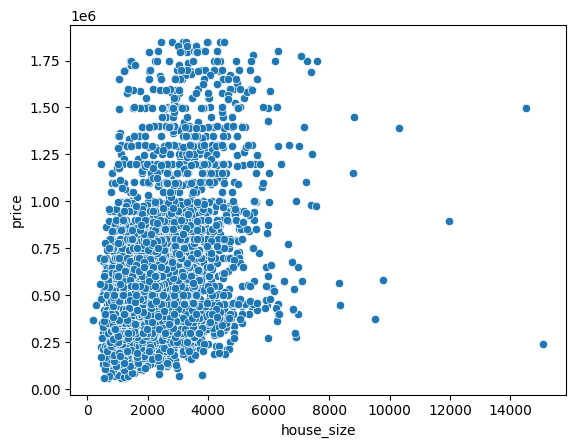

In [78]:
sns.scatterplot(data = df, y = 'price', x = 'house_size')
plt.show()

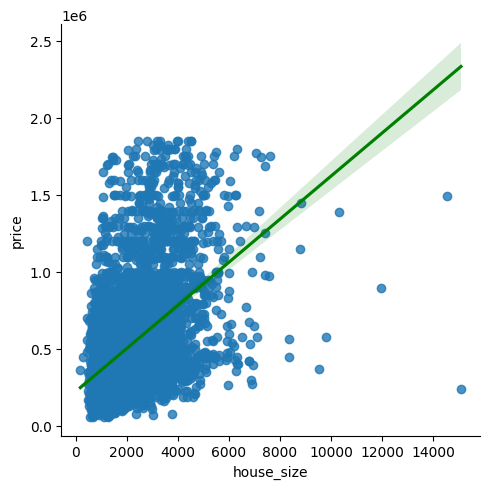

In [81]:
sns.lmplot(data=df, x='house_size', y='price', line_kws={'color':'green'})
plt.show()

I need to find prices for all houses with house_size beteen 900 and 1100,
also I need to find average price for this houses

In [88]:
df.shape

(5958, 10)

In [118]:
houses = df.loc[(df['house_size']> 800) & (df['house_size'] <1200)] 

In [132]:
houses.groupby('house_size')['price'].mean()

house_size
801.0     224900.000000
802.0     294999.500000
803.0     829000.000000
804.0     273980.000000
805.0     399999.000000
              ...      
1194.0    248299.666667
1196.0    308957.142857
1197.0    292966.666667
1198.0    398133.333333
1199.0    342475.000000
Name: price, Length: 272, dtype: float64

In [120]:
average_price = houses['price'].mean()
average_price

348278.19574036513

In [123]:
df.shape

(5958, 10)

In [124]:
df.columns

Index(['status', 'bed', 'bath', 'acre_lot', 'city', 'state', 'zip_code',
       'house_size', 'prev_sold_date', 'price'],
      dtype='object')

In [121]:
import numpy as np

In [122]:
def cost_function(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    errors = predictions - y
    cost = (1/(2*m)) * np.sum(errors**2)
    return cost


In [239]:
X = df[['house_size', 'bed', 'bath']].values  # reshape to 2D array
y = df['price'].values  # target variable
m = len(y)  # number of training examples

# Add a column of ones to X for the bias term
X = np.hstack((np.ones((m, 1)), X))

n = X.shape[1]  # number of features (including the bias term)
theta = np.zeros(n)  # initialize theta with zeros

cost = cost_function(X, y, theta)
print(f"Initial cost: {cost}")


Initial cost: 184963664959.37714


In [126]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = np.zeros(num_iters)

    for i in range(num_iters):
        predictions = X.dot(theta)
        errors = predictions - y
        delta = (1/m) * (X.T.dot(errors))
        theta = theta - alpha * delta
        J_history[i] = cost_function(X, y, theta)

    return theta, J_history


In [179]:
from sklearn.metrics import mean_squared_error

y_hat_train = reg.predict(X_train)
train_cost = mean_squared_error(y_train, y_hat_train)

y_hat_test = reg.predict(X_test)
test_cost = mean_squared_error(y_test, y_hat_test)

print(f"Train cost: {train_cost}")
print(f"Test cost: {test_cost}")


Train cost: 71178854605.87445
Test cost: 72048757404.40863


In [178]:
from sklearn.metrics import r2_score

y_hat_train = reg.predict(X_train)
train_r2 = r2_score(y_train, y_hat_train)

y_hat_test = reg.predict(X_test)
test_r2 = r2_score(y_test, y_hat_test)

print(f"Train R^2: {train_r2}")
print(f"Test R^2: {test_r2}")


Train R^2: 0.3364924475960104
Test R^2: 0.2913100694206069


In [188]:
wat = np.array([1,3,4,5])

In [189]:
wat

array([1, 3, 4, 5])

In [193]:
df_test.rename(columns = {'prev_sold_date': 'sold_date'}, inplace = True)

In [209]:
df_test.loc[(df_test['price']<20_000)&(df_test['house_size'].notnull())]

,status,bed,bath,acre_lot,city,state,zip_code,house_size,sold_date,price
1752,for_sale,3.0,1.0,0.04,Manati,Puerto Rico,674.0,595.0,NaN,19900.0
1963,for_sale,3.0,1.0,0.04,Manati,Puerto Rico,674.0,595.0,NaN,19900.0
2913,for_sale,3.0,1.0,0.04,Manati,Puerto Rico,674.0,595.0,NaN,19900.0
3305,for_sale,3.0,1.0,0.04,Manati,Puerto Rico,674.0,595.0,NaN,19900.0
3760,for_sale,3.0,1.0,0.04,Manati,Puerto Rico,674.0,595.0,NaN,19900.0
...,...,...,...,...,...,...,...,...,...,...
200403,for_sale,NaN,2.0,1.92,Wareham,Massachusetts,2571.0,2716.0,NaN,10000.0
200706,for_sale,NaN,2.0,1.92,Wareham,Massachusetts,2571.0,2716.0,NaN,10000.0
201710,for_sale,NaN,2.0,1.92,Wareham,Massachusetts,2571.0,2716.0,NaN,10000.0
202697,for_sale,NaN,2.0,1.92,Wareham,Massachusetts,2571.0,2716.0,NaN,10000.0


In [218]:
df_test.loc[df_test.duplicated]

,status,bed,bath,acre_lot,city,state,zip_code,house_size,sold_date,price
77,for_sale,NaN,NaN,0.21,Aguada,Puerto Rico,602.0,NaN,NaN,74000.0
135,for_sale,3.0,2.0,0.08,Ponce,Puerto Rico,728.0,1500.0,NaN,105000.0
139,for_sale,5.0,3.0,7.46,Las Marias,Puerto Rico,670.0,5403.0,NaN,300000.0
140,for_sale,3.0,2.0,0.10,Lares,Puerto Rico,669.0,4161.0,NaN,155000.0
148,for_sale,3.0,2.0,0.05,Yauco,Puerto Rico,698.0,1118.0,NaN,122500.0
...,...,...,...,...,...,...,...,...,...,...
205995,for_sale,2.0,1.0,0.17,South Yarmouth,Massachusetts,2664.0,848.0,2009-05-01,439000.0
205996,for_sale,2.0,2.0,NaN,Brewster,Massachusetts,2631.0,948.0,2020-10-09,385000.0
205997,for_sale,2.0,1.0,0.23,South Yarmouth,Massachusetts,2664.0,864.0,2003-09-18,479900.0
205998,for_sale,2.0,3.0,0.23,Chatham,Massachusetts,2633.0,1660.0,NaN,1299000.0


In [216]:
df_test.duplicated

<bound method DataFrame.duplicated of           status  bed  bath  acre_lot            city          state  \
0       for_sale  3.0   2.0      0.12        Adjuntas    Puerto Rico   
1       for_sale  4.0   2.0      0.08        Adjuntas    Puerto Rico   
2       for_sale  2.0   1.0      0.15      Juana Diaz    Puerto Rico   
3       for_sale  4.0   2.0      0.10           Ponce    Puerto Rico   
4       for_sale  6.0   2.0      0.05        Mayaguez    Puerto Rico   
...          ...  ...   ...       ...             ...            ...   
205995  for_sale  2.0   1.0      0.17  South Yarmouth  Massachusetts   
205996  for_sale  2.0   2.0       NaN        Brewster  Massachusetts   
205997  for_sale  2.0   1.0      0.23  South Yarmouth  Massachusetts   
205998  for_sale  2.0   3.0      0.23         Chatham  Massachusetts   
205999  for_sale  4.0   4.0      0.91         Chatham  Massachusetts   

        zip_code  house_size   sold_date      price  
0          601.0       920.0         NaN   

In [221]:
duplicated = df_test[df_test.duplicated()]

In [223]:
print(duplicated.head(15))

       status  bed  bath  acre_lot           city        state  zip_code  \
77   for_sale  NaN   NaN      0.21         Aguada  Puerto Rico     602.0   
135  for_sale  3.0   2.0      0.08          Ponce  Puerto Rico     728.0   
139  for_sale  5.0   3.0      7.46     Las Marias  Puerto Rico     670.0   
140  for_sale  3.0   2.0      0.10          Lares  Puerto Rico     669.0   
148  for_sale  3.0   2.0      0.05          Yauco  Puerto Rico     698.0   
149  for_sale  3.0   2.0      3.88  San Sebastian  Puerto Rico     685.0   
150  for_sale  4.0   4.0      0.22       Mayaguez  Puerto Rico     680.0   
161  for_sale  9.0   7.0      0.46       Mayaguez  Puerto Rico     680.0   
167  for_sale  NaN   NaN      0.99           Moca  Puerto Rico     676.0   
175  for_sale  6.0   3.0      0.25         Anasco  Puerto Rico     610.0   
179  for_sale  NaN   NaN      0.25         Anasco  Puerto Rico     610.0   
181  for_sale  3.0   1.0       NaN       Mayaguez  Puerto Rico     680.0   
182  for_sal

In [225]:
# Create a boolean mask for duplicated rows
duplicated_mask = df_test.duplicated(keep=False)

# Use the mask to filter the DataFrame
duplicated_df_test = df_test[duplicated_mask]

# Display the first few duplicated rows
duplicated_df_test.head(15)


,status,bed,bath,acre_lot,city,state,zip_code,house_size,sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
5,for_sale,4.0,3.0,0.46,San Sebastian,Puerto Rico,612.0,2520.0,NaN,179000.0
6,for_sale,3.0,1.0,0.20,Ciales,Puerto Rico,639.0,2040.0,NaN,50000.0
7,for_sale,3.0,2.0,0.08,Ponce,Puerto Rico,731.0,1050.0,NaN,71600.0
8,for_sale,2.0,1.0,0.09,Ponce,Puerto Rico,730.0,1092.0,NaN,100000.0
9,for_sale,5.0,3.0,7.46,Las Marias,Puerto Rico,670.0,5403.0,NaN,300000.0


In [226]:
df_test.columns

Index(['status', 'bed', 'bath', 'acre_lot', 'city', 'state', 'zip_code',
       'house_size', 'sold_date', 'price'],
      dtype='object')

In [228]:
# Create a boolean mask for duplicated rows
duplicated_mask = df_test.duplicated(keep=False)

# Use the mask to filter the DataFrame
duplicated_df_test = df_test[duplicated_mask]

# Sort the DataFrame by all columns
sorted_duplicated_df_test = duplicated_df_test.sort_values(by=['status', 'bed', 'bath', 'acre_lot', 'city', 'state', 'zip_code', 'house_size', 'sold_date', 'price'])

# Display the sorted DataFrame
print(sorted_duplicated_df_test)


                status  bed  bath  acre_lot       city          state  \
103039        for_sale  1.0   1.0      0.01     Boston  Massachusetts   
108831        for_sale  1.0   1.0      0.01     Boston  Massachusetts   
121493        for_sale  1.0   1.0      0.01     Boston  Massachusetts   
125494        for_sale  1.0   1.0      0.01     Boston  Massachusetts   
128028        for_sale  1.0   1.0      0.01     Boston  Massachusetts   
...                ...  ...   ...       ...        ...            ...   
107301  ready_to_build  4.0   NaN       NaN  Hopkinton  Massachusetts   
112014  ready_to_build  4.0   NaN       NaN  Hopkinton  Massachusetts   
114118  ready_to_build  4.0   NaN       NaN  Hopkinton  Massachusetts   
135235  ready_to_build  4.0   NaN       NaN  Hopkinton  Massachusetts   
138988  ready_to_build  4.0   NaN       NaN  Hopkinton  Massachusetts   

        zip_code  house_size   sold_date      price  
103039    2108.0       519.0  2011-04-22   679000.0  
108831    2108.

In [236]:
print(df_test.iloc[107301])

status        ready_to_build
bed                      4.0
bath                     NaN
acre_lot                 NaN
city               Hopkinton
state          Massachusetts
zip_code              1748.0
house_size            4747.0
sold_date                NaN
price              1841995.0
Name: 107301, dtype: object


In [237]:
df_test.iloc[112014]

status        ready_to_build
bed                      4.0
bath                     NaN
acre_lot                 NaN
city               Hopkinton
state          Massachusetts
zip_code              1748.0
house_size            4747.0
sold_date                NaN
price              1841995.0
Name: 112014, dtype: object

In [238]:
df.info

<bound method DataFrame.info of           status  bed  bath  acre_lot          city           state  zip_code  \
829     for_sale  7.0   3.0      0.09        Dorado     Puerto Rico     949.0   
10344   for_sale  5.0   4.0      0.99  Saint Thomas  Virgin Islands     802.0   
24237   for_sale  3.0   3.0      0.45        Agawam   Massachusetts    1001.0   
24238   for_sale  3.0   2.0      0.36        Agawam   Massachusetts    1001.0   
24244   for_sale  3.0   2.0      0.46        Agawam   Massachusetts    1001.0   
...          ...  ...   ...       ...           ...             ...       ...   
205433  for_sale  3.0   3.0      0.67         Truro   Massachusetts    2666.0   
205435  for_sale  2.0   2.0      0.79         Truro   Massachusetts    2666.0   
205436  for_sale  5.0   3.0      0.84         Truro   Massachusetts    2666.0   
205721  for_sale  2.0   2.0      0.25  Provincetown   Massachusetts    2657.0   
205927  for_sale  4.0   3.0      0.44  West Harwich   Massachusetts    2671.0

In [268]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# One-hot encoding for 'city' column
df3 = pd.get_dummies(df, columns=['city'])

# Define features and target
features = df3[['bed', 'bath'] + [col for col in df.columns if 'city_' in col]]
target = df3['house_size']

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 404811.02695776714


In [271]:
# Define the input parameters
bed = 2
bath = 2
city = 'Boston'  # replace with the city you're interested in

# Create a new DataFrame with the same columns as your features
input_df = pd.DataFrame(columns=features.columns)

# Fill in the values for bed and bath
input_df.loc[0, 'bed'] = bed
input_df.loc[0, 'bath'] = bath

# Set the column corresponding to the city to 1, and all other city columns to 0
for column in input_df.columns:
    if 'city_' in column:
        if column == 'city_' + city:
            input_df.loc[0, column] = 1
        else:
            input_df.loc[0, column] = 0

# Make the prediction
predicted_house_size = model.predict(input_df).round(0)
print(f'Predicted house size: {predicted_house_size[0]}')


Predicted house size: 1403.0


In [286]:
mean = df['price'].mean().round()
median = df['price'].median()
mode = df['price'].mode()

print(mean, median, mode)

513584.0 415000.0 0    299900.0
Name: price, dtype: float64


In [282]:
df['price'].describe()

count    5.958000e+03
mean     5.135841e+05
std      3.258474e+05
min      5.900000e+04
25%      2.899000e+05
50%      4.150000e+05
75%      6.400000e+05
max      1.850000e+06
Name: price, dtype: float64

In [275]:
grouped_h = df.groupby('city')['house_size'].mean()
grouped_h

city
Abington         1881.875000
Acton            2938.714286
Adams            2564.153846
Agawam           1869.125000
Alford           1948.750000
                    ...     
Worcester        2125.428571
Worthington      2180.000000
Wrentham         2064.000000
Yarmouth         2111.000000
Yarmouth Port    2203.400000
Name: house_size, Length: 520, dtype: float64

In [ ]:
group

In [280]:
grouped_h['Boston'].round()

1444.0